In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
# training and validation

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  2,  5,  3,  6,  1,  4,  9, 10]), tensor([7, 0]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [10]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[-0.8095],
        [-0.7224]], grad_fn=<AddmmBackward>)

In [11]:
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [12]:
linear_model.weight

Parameter containing:
tensor([[0.0626]], requires_grad=True)

In [16]:
x = torch.ones(1)
linear_model(x)

tensor([-0.8834], grad_fn=<AddBackward0>)

In [15]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834],
        [-0.8834]], grad_fn=<AddmmBackward>)

In [17]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [20]:
linear_model.parameters()

<generator object Module.parameters at 0x7f914f7729e0>

In [21]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.3031]], requires_grad=True),
 Parameter containing:
 tensor([-0.0318], requires_grad=True)]

In [22]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [23]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 251.0650, Validation loss 7.7904
Epoch 1000, Training loss 5.7763, Validation loss 11.2325
Epoch 2000, Training loss 3.4698, Validation loss 2.3865
Epoch 3000, Training loss 3.0995, Validation loss 2.1647

Parameter containing:
tensor([[5.3532]], requires_grad=True)
Parameter containing:
tensor([-17.1936], requires_grad=True)


In [24]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 375.7361, Validation loss 7.9988
Epoch 1000, Training loss 5.8249, Validation loss 11.4505
Epoch 2000, Training loss 3.4776, Validation loss 2.4039
Epoch 3000, Training loss 3.1007, Validation loss 2.1605

Parameter containing:
tensor([[5.3514]], requires_grad=True)
Parameter containing:
tensor([-17.1828], requires_grad=True)


In [25]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [26]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [28]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [29]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [30]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2348], requires_grad=True)

In [31]:

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 234.0871, Validation loss 6.7780
Epoch 1000, Training loss 7.5954, Validation loss 5.3708
Epoch 2000, Training loss 5.3087, Validation loss 3.7752
Epoch 3000, Training loss 2.8194, Validation loss 5.0047
Epoch 4000, Training loss 2.1775, Validation loss 6.5584
Epoch 5000, Training loss 2.0117, Validation loss 7.6108
output tensor([[-1.3155],
        [ 2.9033]], grad_fn=<AddmmBackward>)
answer tensor([[-4.0000],
        [ 0.5000]])
hidden tensor([[ -0.1036],
        [-16.3448],
        [-18.1114],
        [ -0.8864],
        [ 19.2488],
        [ -1.6201],
        [-10.1674],
        [  0.7808]])


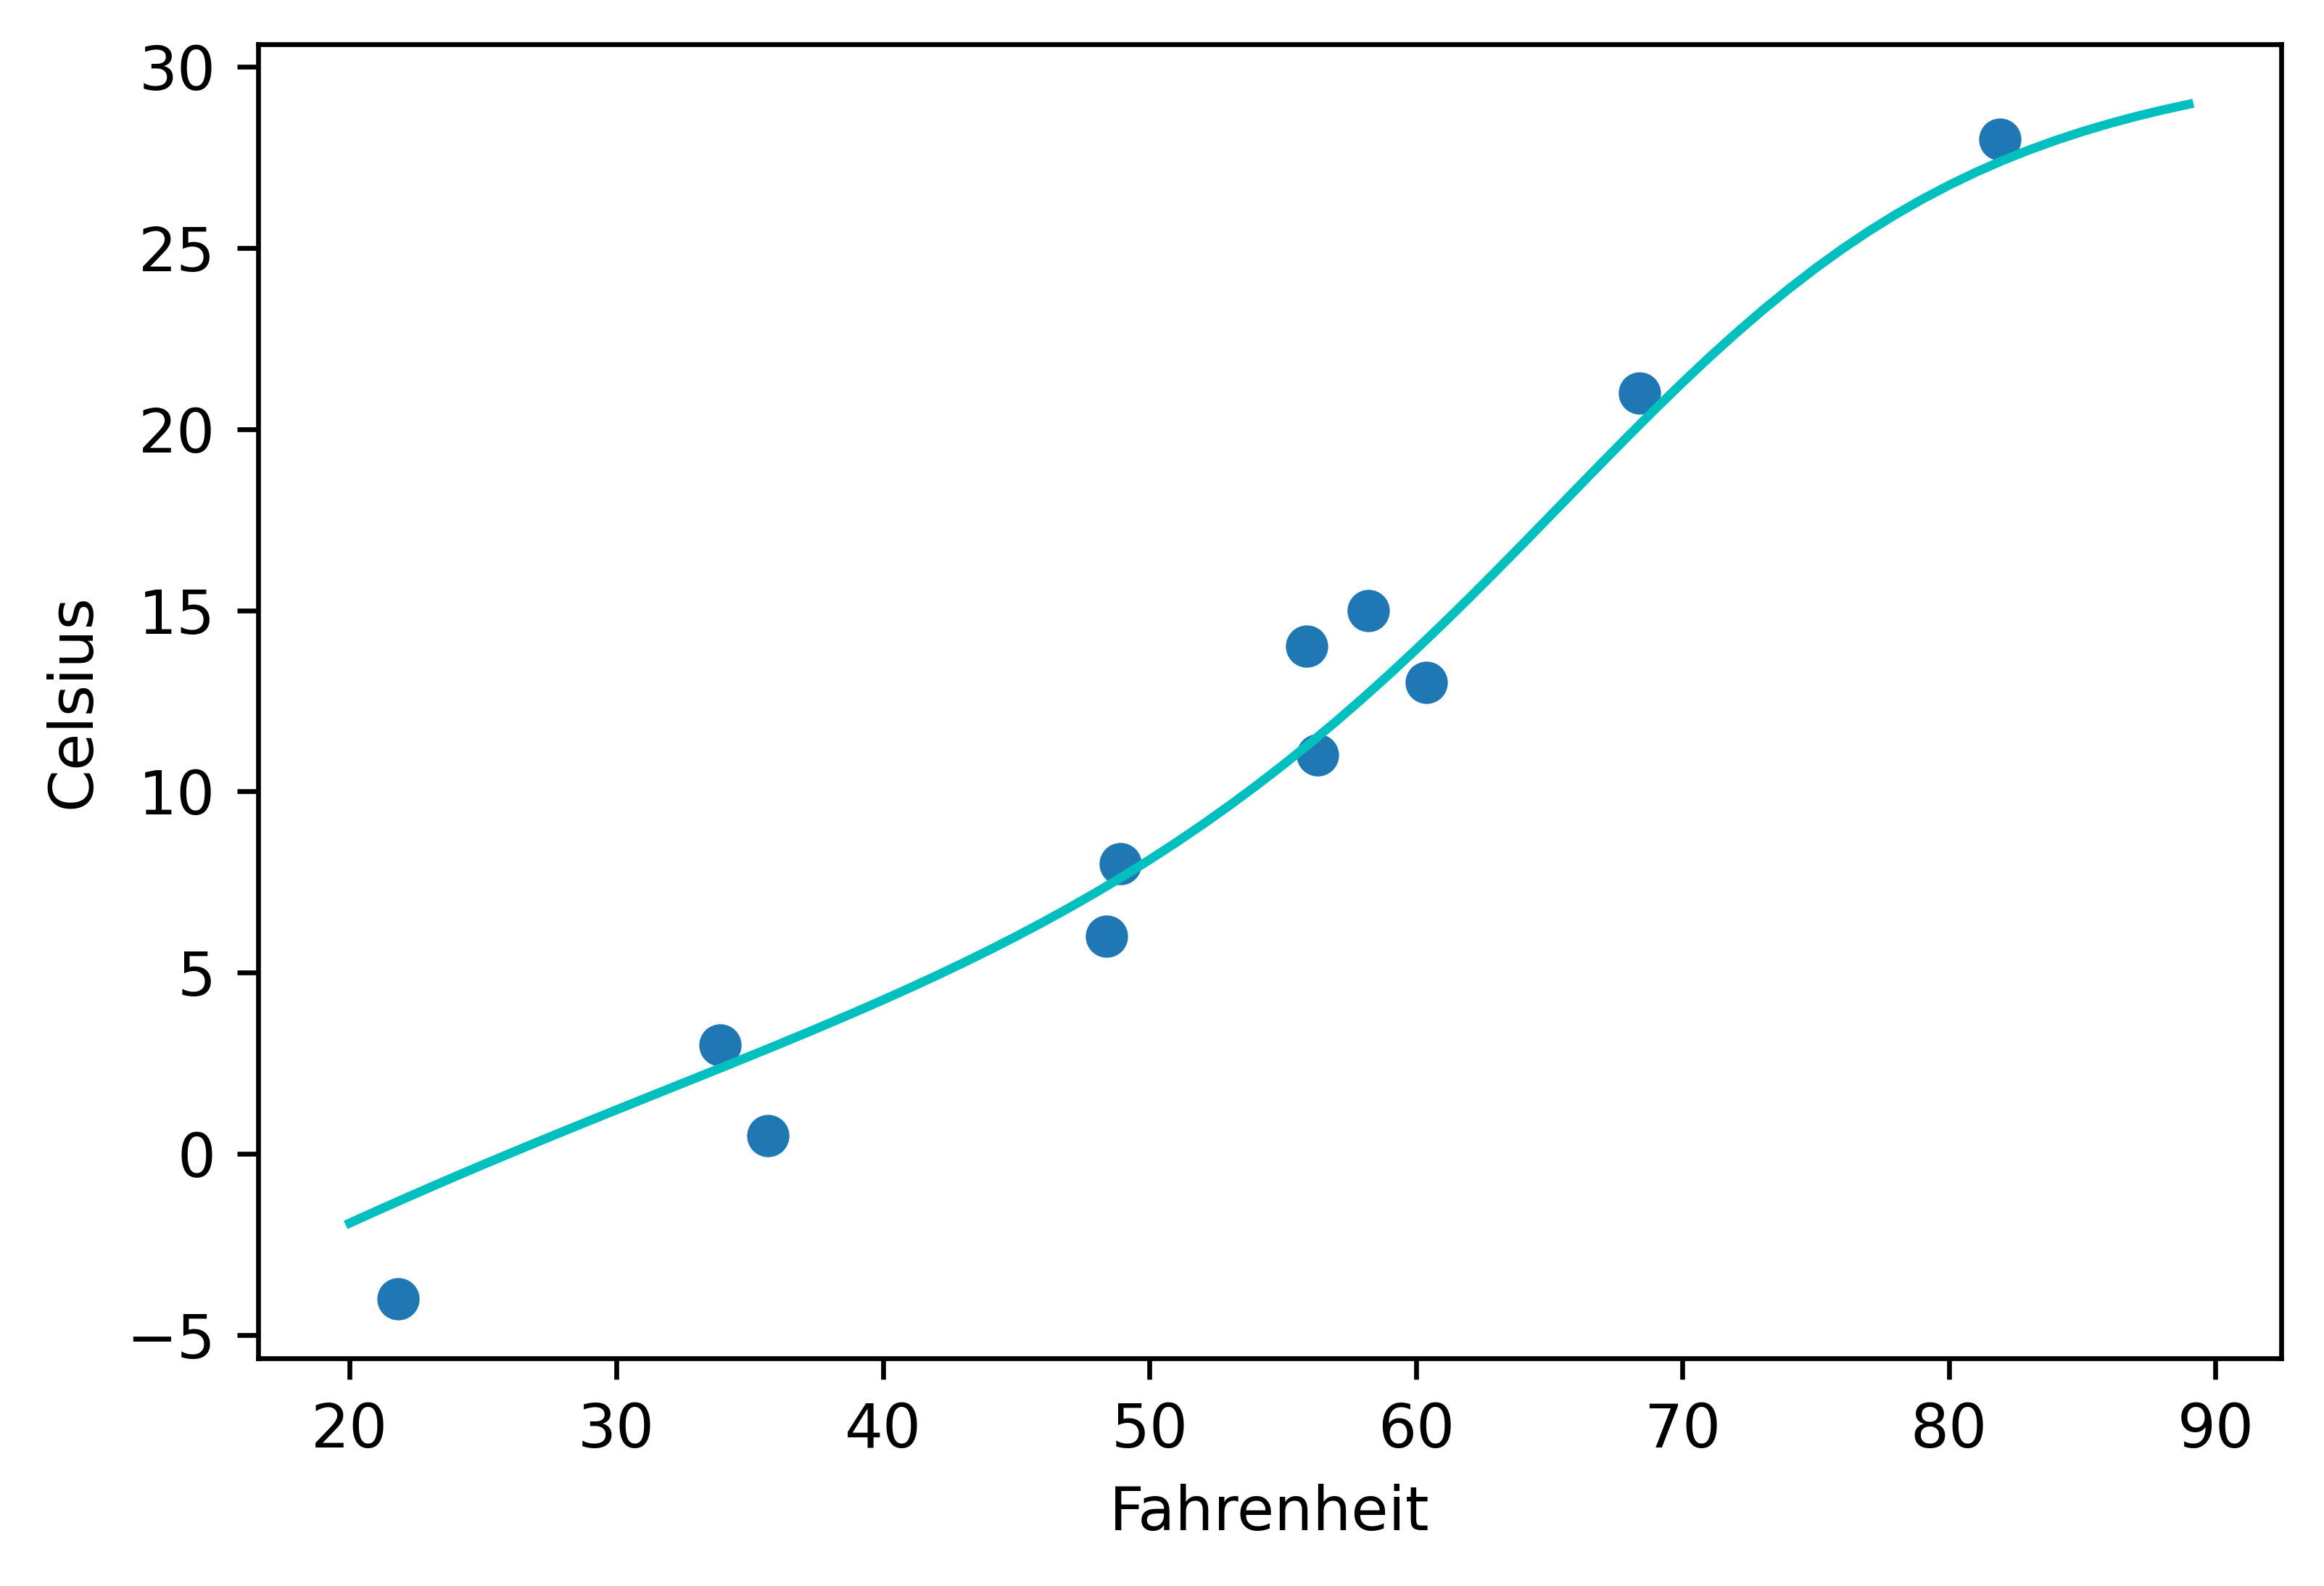

In [34]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
#plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 216.3915, Validation loss 9.1211
Epoch 1000, Training loss 46.0551, Validation loss 155.9319
Epoch 2000, Training loss 39.0797, Validation loss 133.9494
Epoch 3000, Training loss 32.4563, Validation loss 108.6938
Epoch 4000, Training loss 26.6739, Validation loss 84.6150
Epoch 5000, Training loss 20.9131, Validation loss 60.2957


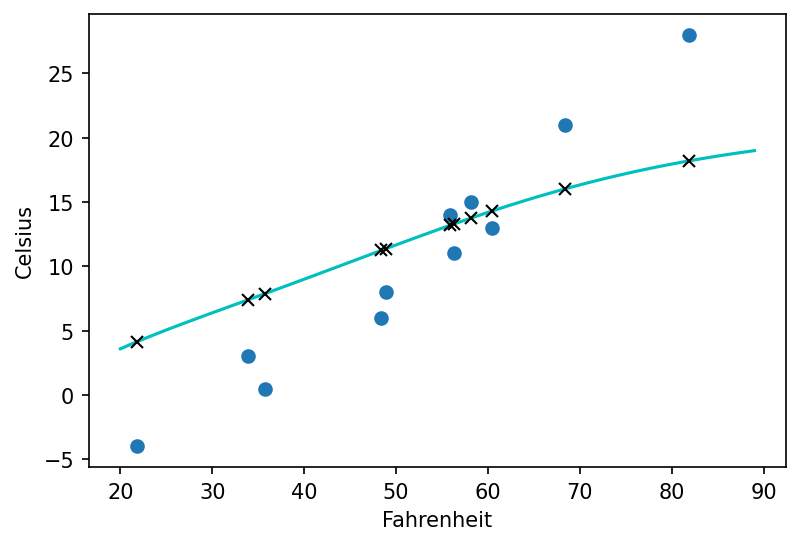

In [35]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


## Activation Function

https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch6/2_activation_functions.ipynb